# Albero di Decisionale

<figure>
    <img src="https://inside-machinelearning.com/wp-content/uploads/2022/09/niko-photos-tGTVxeOr_Rs-unsplash.jpg" style="width:70%">
    <figcaption>Image from https://en.wikipedia.org/wiki/Boston</figcaption>
</figure>



- Nel machine learning un albero di decisione è un modello predittivo, dove ogni nodo interno rappresenta una variabile, un arco verso un nodo figlio rappresenta un possibile valore per quella proprietà e una foglia il valore predetto per la variabile obiettivo a partire dai valori delle altre proprietà, che nell'albero è rappresentato dal cammino (path) dal nodo radice (root) al nodo foglia

src: https://it.wikipedia.org/wiki/Albero_di_decisione

<figure>
    <img src="https://www.okpedia.it/data/okpedia/albero-decisionale-esempio.gif" style="width:60%">
    <figcaption>Image from okpedia.it/figcaption>
</figure>


##### Load a Data

In [2]:
import os
import pandas as pd

df = pd.read_csv(r"C:\Users\ElvisThierrySounnaVo\Documents\Python Scripts\winequality-white.csv", sep= ";")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [3]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Nel nostro caso lo usiamo per classificare i vini in 7 livelli di qualità: [3, 4, 5, 6, 7, 8, 9]

Il nostro obiettivo è quello di prevedere la qualità dei vini in base alle caratteristiche.

Possiamo quindi creare direttamente X_train, X_test, y_train, y_testper addestrare il modello.

In [4]:
from sklearn.model_selection import train_test_split

features = df.drop(['quality'], axis=1)
labels = df[['quality']]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

L'algoritmo Decision Tree analizza i nostri dati. Si basa sulle caratteristiche ( acidità fissa, acidità volatile, acido citrico, zuccheri residui, cloruri, anidride solforosa libera, anidride solforosa totale, densità, pH, solfati, alcol, qualità) per prevedere a quale classe appartiene ciascun vino 

L'albero decisionale è costituito da nodo, ramo e foglie.

In un nodo, l'algoritmo testa una caratteristica del nostro set di dati per discriminare i dati. È qui che crea una regola di discriminazione.

Il test effettuato ha 2 possibili risultati: Vero o Falso.

Ad esempio, nel nostro caso, un test può essere: il tasso alcolico è superiore al 7%?

In entrambi i casi, l'albero decisionale creerà due percorsi: Vero e Falso.

Queste due opzioni creano due rami che portano ad un altro nodo dove verrà effettuato un altro test per discriminare i nostri dati.

Il primo nodo è chiamato radice.

Il nodo finale di un ramo è chiamato foglia. Significa processo decisionale.

La profondità di un albero è definita dalla lunghezza del percorso più lungo tra una radice e una foglia.

Possiamo inizializzare il nostro albero con due iperparametri:

-criterio = “entropia”

-profondità_massima = 3

In [5]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)                                        

In [6]:
# Formiamo l'albero
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [7]:
# Calcoliamo le sue prestazioni
decisionTree.score(X_test, y_test)

0.5142857142857142

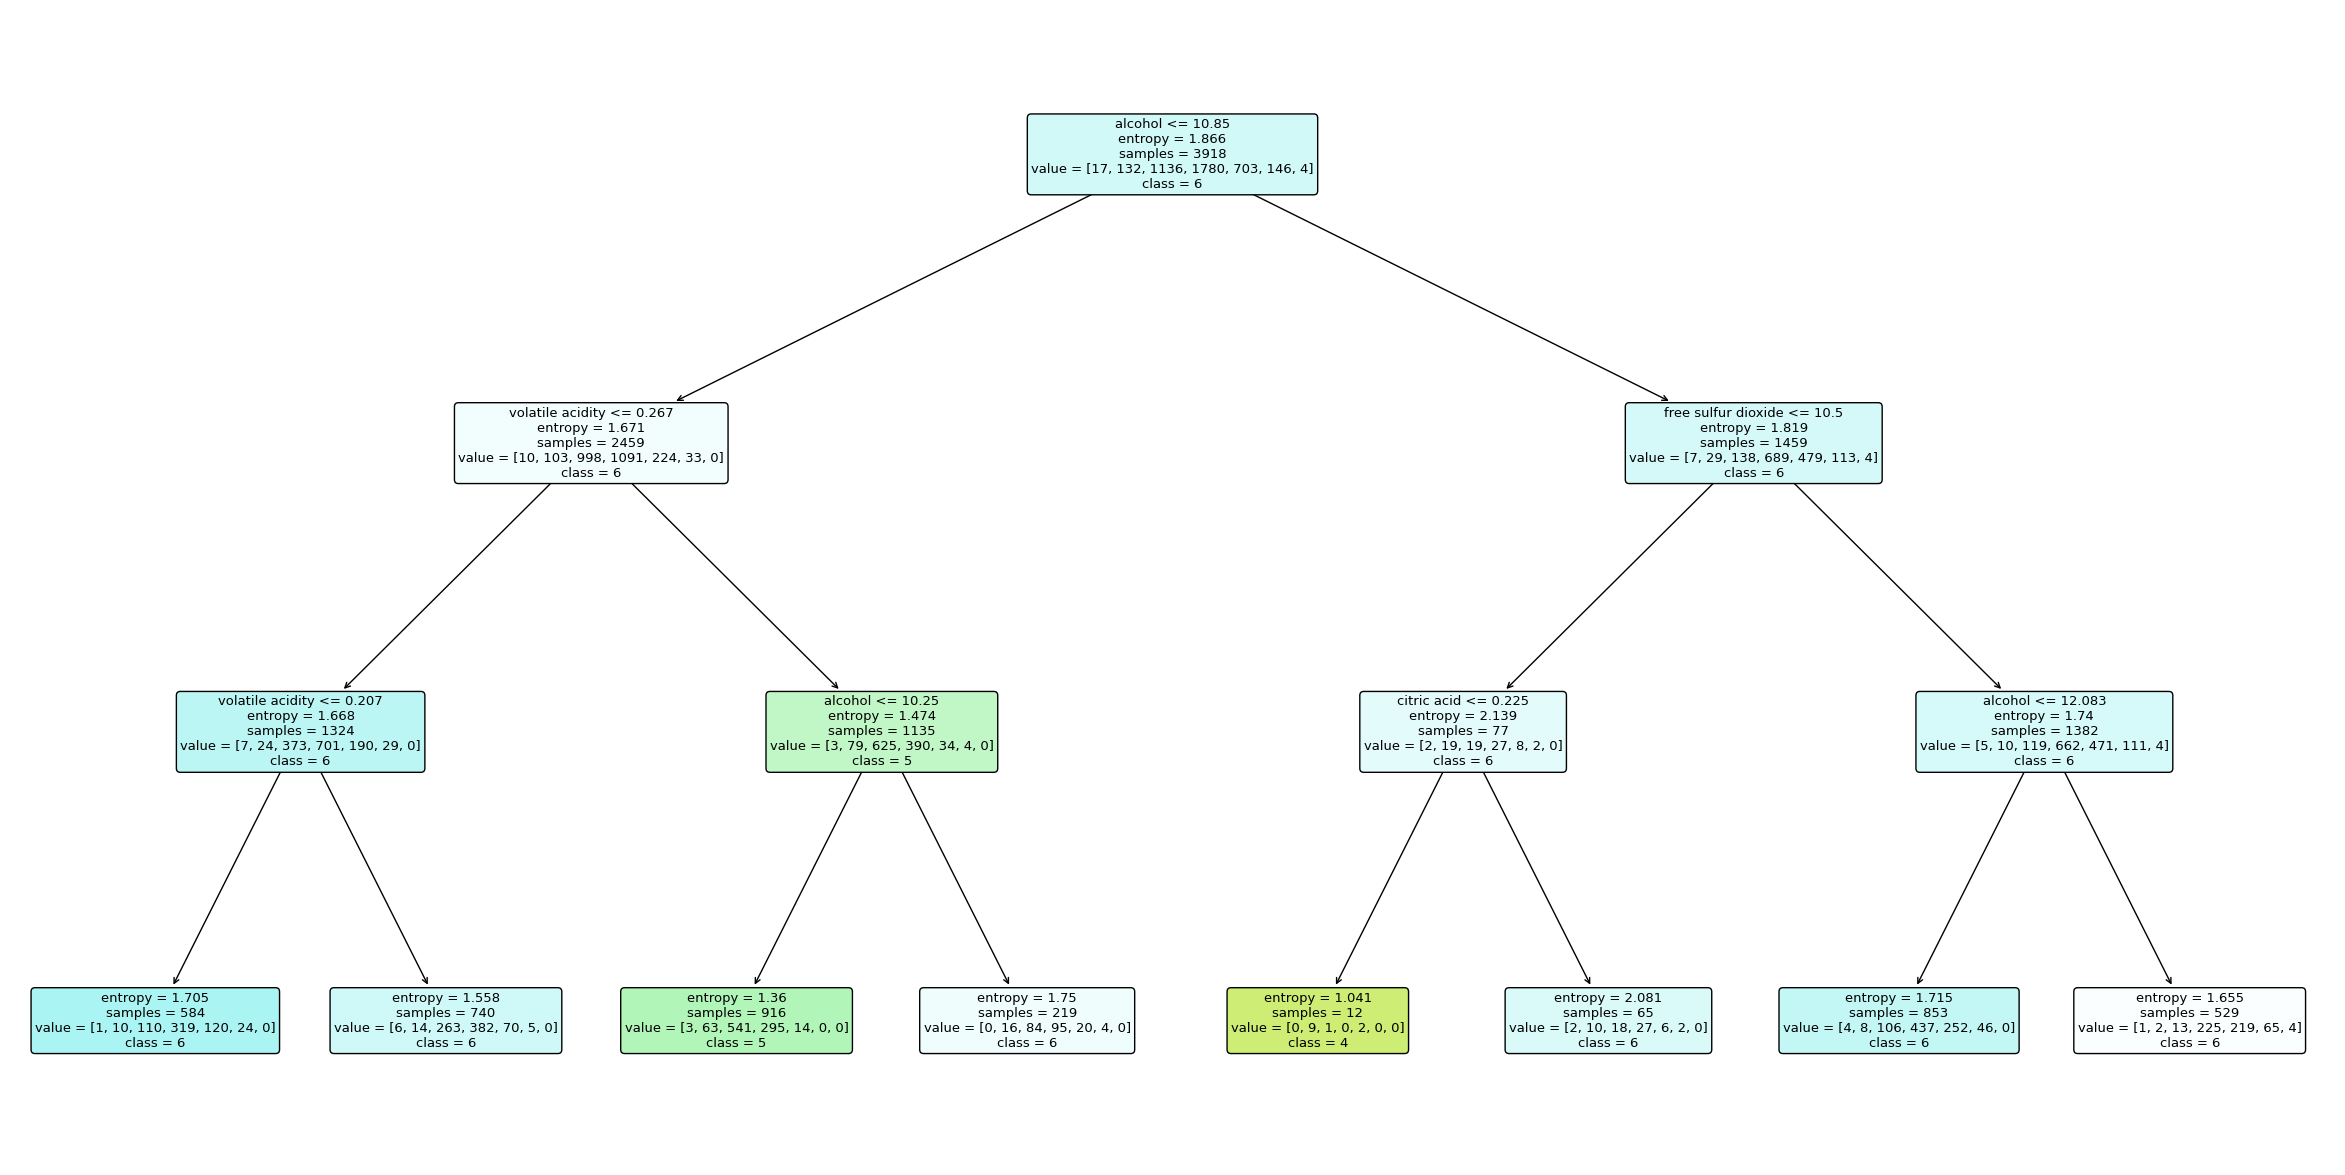

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
labels_unique = labels.quality.unique().tolist()
labels_unique.sort()
labels_unique
# Creazione del grafo dell'albero decisionale utilizzando matplotlib
plt.figure(figsize=(30, 15))
tree.plot_tree(decisionTree, 
               feature_names=features.columns.to_list(),
               class_names=[str(x) for x in labels_unique],
               filled=True, rounded=True)
plt.show()

Vediamo qui che l'albero decisionale non ha abbastanza foglie per prevedere le classi 3, 8 e 9.

L’Albero Decisionale, infatti, dà priorità alle classi con il maggior numero di vini. Qui l'Albero non ha ancora avuto il tempo di analizzare le classi che contengono meno vini.

Avremo quindi bisogno di una profondità maggiore per ottenere un buon albero decisionale.

### Albero decisionale ponderato

Infine, vediamo l'iperparametro che potrebbe esseere più rilevante:

* class_weight (dizionario) – durante il calcolo del criterio , l'algoritmo misura l'impurità in tutte le classi nel set di dati. Dà lo stesso peso a ciascuna classe. Ma indicando in class_weight un peso diverso per ciascuna classe, le statistiche saranno diverse e influenzeranno il risultato finale dell'algoritmo.

* min_weight_fraction_leaf (numero virgola) – La frazione ponderata minima della somma totale dei pesi (di tutti i campioni di input) richiesta per trovarsi in un nodo foglia.
Qui ti suggerisco di utilizzare class_weight . Questa può essere una buona opzione per migliorare il modello perché il numero di vini varia notevolmente a seconda della classe.

*Attribuire quindi un peso diverso alle classi consentirà al criterio di prendere in considerazione la quantità di vino in ciascuna classe.*

Indicizziamo il valore dei pesi in base al numero di vini presenti nella classe: {3:1, 4:2, 5:4, 6:5, 7:3, 8:2, 9:1}. La classe 3 ha un peso pari a 1, la classe 4 ha un peso pari a 2, ecc.

Pertanto, maggiore è il numero di vini, maggiore è il peso:

In [9]:
decisionTree_pond = tree.DecisionTreeClassifier(criterion="entropy",class_weight={3:1, 4:2, 5:4, 6:5, 7:3, 8:2, 9:1})

In [10]:
decisionTree_pond.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={3: 1, 4: 2, 5: 4, 6: 5, 7: 3, 8: 2, 9: 1},
                       criterion='entropy')

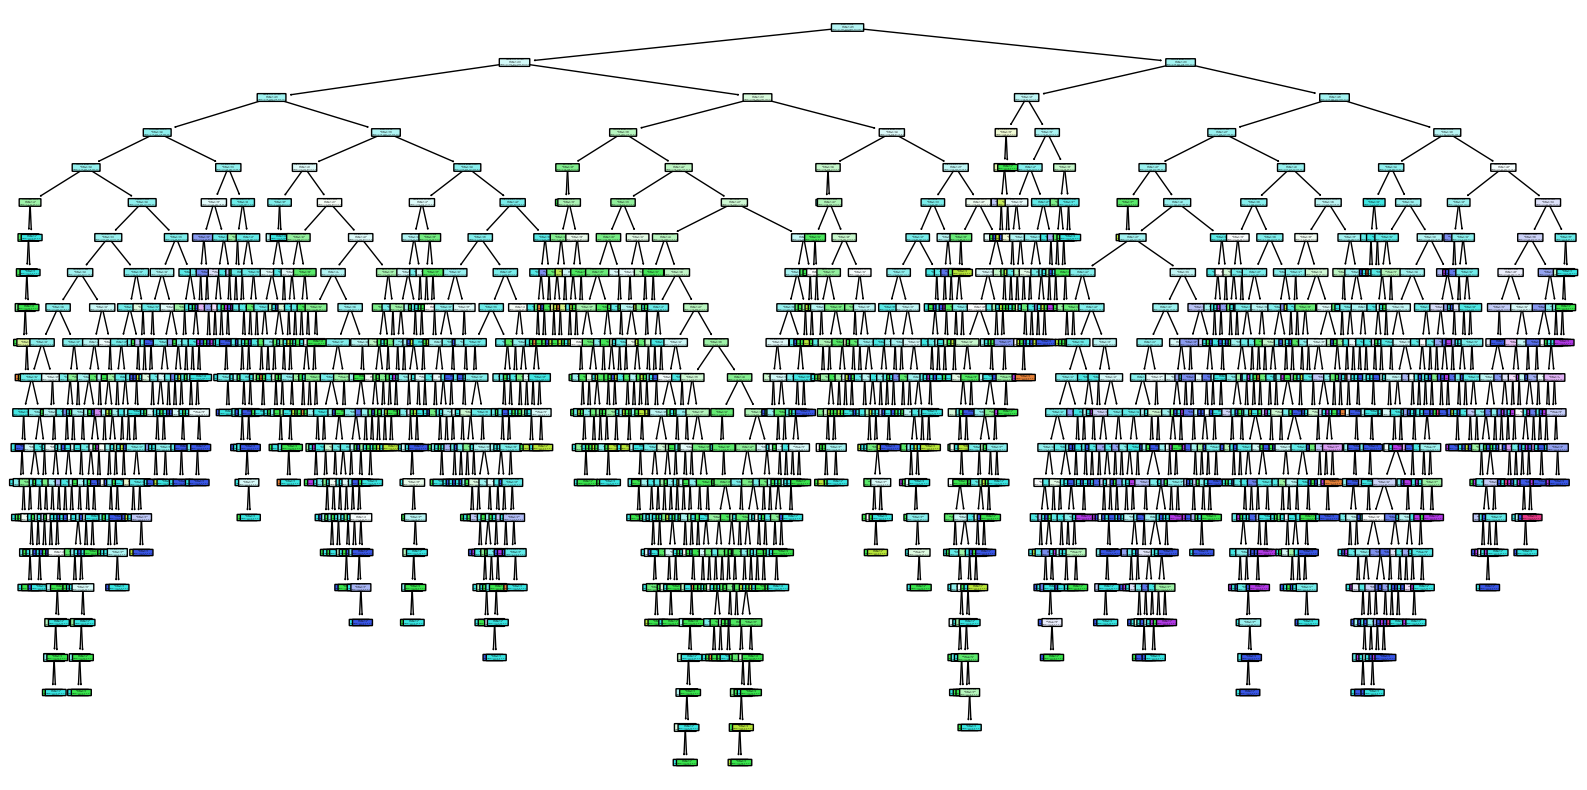

In [11]:
# Creazione del grafo dell'albero decisionale con matplotlib
plt.figure(figsize=(20, 10))
tree.plot_tree(decisionTree_pond, 
               feature_names=features.columns.to_list(),
               class_names=[str(x) for x in labels_unique],
               filled=True, rounded=True)
plt.show()

In [12]:
decisionTree_pond.score(X_test, y_test)

0.6

Questo metodo di ottimizzazione modificando gli iperparametri è chiamato: ottimizzazione degli iperparametri.

Ma esistono molte altre tecniche per migliorare un modello di Machine Learning:

* Normalizza i nostri dati
* Convalida incrociata
* Aumento dei dati
* Metodi generali